# Plotting

In [27]:
using Pkg
Pkg.activate(".")
Pkg.instantiate()

  Activating project at `/global/u2/j/jaimerz/PhD/MicroCanonicalHMC.jl/examples`


In [28]:
using Revise, Adapt, CMBLensing, CMBLensingInferenceTestProblem, JLD2, LaTeXStrings, LinearAlgebra, 
    MCMCChains, MCMCDiagnosticTools, MicroCanonicalHMC, MuseInference, MuseInference, Plots, 
    ProgressMeter, Random, Statistics, Zygote

In [29]:
Plots.default(fmt=:png, dpi=120, size=(500,300), legendfontsize=10)

In [55]:
Nside = 64
T = Float64;
prob = load_cmb_lensing_problem(;storage=Array, T, Nside, masking=true, global_parameters=false);

## Samples

In [30]:
function make_chain(samples::AbstractMatrix)
    return Chains(permutedims(reduce(hcat, [[exp.(sample[end÷2-2:end÷2-1]); sample[end-3:end]] for sample in eachcol(samples) if all(isfinite.(sample))])),
    [:r, :Aϕ, :p_logr, :p_logAϕ, :dE, :logpdf])
end    

make_chain (generic function with 1 method)

In [76]:
unmasked_muse_chain = load("../chains/MUSE/CMBLensing_unmasked_NSIDE_64", "chain_muse");
masked_muse_chain = load("../chains/MUSE/CMBLensing_masked_NSIDE_64", "chain_muse");

In [69]:
unmasked_hmc_samples = load("../chains/HMC/CMBLensing_unmasked", "_samples_hmc")
masked_hmc_samples = load("../chains/HMC/CMBLensing_masked", "_samples_hmc");

In [70]:
unmasked_mchmc_samples = load("../chains/MCHMC/CMBLensing_unmasked_TEV_0.001", "samples");
masked_mchmc_samples = load("../chains/MCHMC/CMBLensing_masked_TEV_0.0001", "samples");
masked_mchmc_samples = load("../chains/MCHMC/CMBLensing_masked_TEV_0.0001", "samples");

In [71]:
unmasked_mchmc_chain = make_chain(unmasked_mchmc_samples);
masked_mchmc_chain = make_chain(masked_mchmc_samples);

## Plotting

In [72]:
d = 12290

# Unmasked
esspc_unmasked_mchmc = MCMCDiagnosticTools.ess(unmasked_mchmc_chain)[[:r,:Aϕ],:ess]/10_000

esss_unmasked_hmc, _ = MicroCanonicalHMC.Summarize(unmasked_hmc_samples)
esspc_unmasked_hmc = esss_unmasked_hmc[end-1:end] ./ 28_0000

esspc_unmasked_muse = 0.006

# Masked
esspc_masked_mchmc = MCMCDiagnosticTools.ess(masked_mchmc_chain)[[:r,:Aϕ],:ess]/10_000

esss_masked_hmc, _ = MicroCanonicalHMC.Summarize(masked_hmc_samples)
esspc_masked_hmc = esss_masked_hmc[end-1:end] ./ 28_0000

esspc_masked_muse = 0.006

0.006

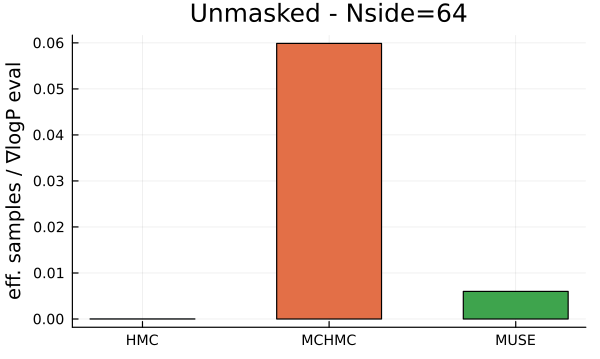

In [73]:
which_ess = minimum # can be: first (r), last (Aphi), or minimum
bar(["HMC" "MCHMC" "MUSE"], which_ess.([[esspc_unmasked_hmc] [esspc_unmasked_mchmc] [esspc_unmasked_muse]]),
     ylabel = "eff. samples / ∇logP eval", legend=false, title="Unmasked - Nside=64")

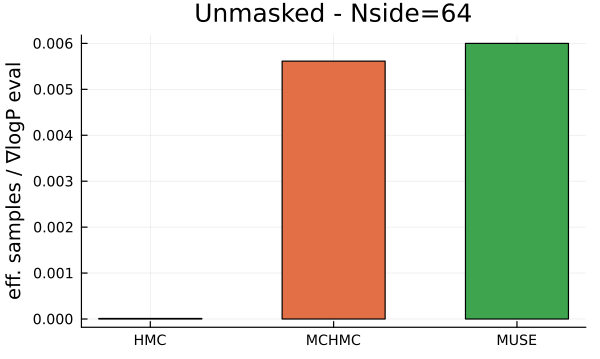

In [74]:
which_ess = minimum # can be: first (r), last (Aphi), or minimum
bar(["HMC" "MCHMC" "MUSE"], which_ess.([[esspc_masked_hmc] [esspc_masked_mchmc] [esspc_masked_muse]]),
     ylabel = "eff. samples / ∇logP eval", legend=false, title="Unmasked - Nside=64")

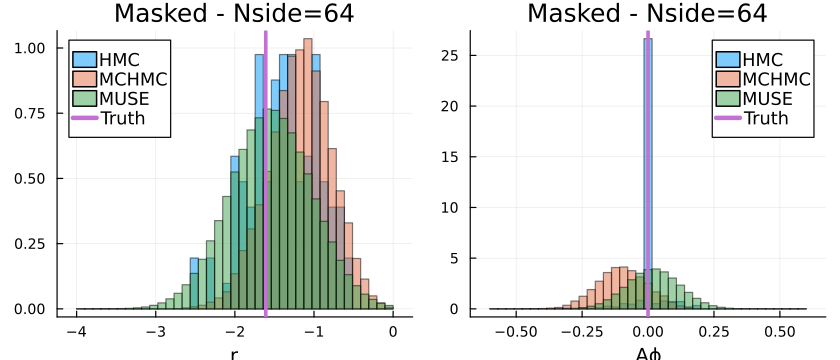

In [75]:
plot(
    begin
        histogram(unmasked_hmc_samples[:, end-1], normalize=:pdf, alpha=0.5, bins=range(-4,0,length=40), label="HMC", xlabel="r")
        histogram!(log.(unmasked_mchmc_chain[:r]), normalize=:pdf, alpha=0.5, bins=range(-4,0,length=40), label="MCHMC")
        histogram!(unmasked_muse_chain[:logr], normalize=:pdf, alpha=0.5, bins=range(-4,0,length=40), label="MUSE")
        vline!([prob.Ωtrue.θ.r], c=4, lw=3, label="Truth")
    end, 
    begin
        histogram(unmasked_hmc_samples[:, end], normalize=:pdf, alpha=0.5, bins=range(-0.6,0.6,length=40), label="HMC", xlabel="Aϕ")
        histogram!(log.(unmasked_mchmc_chain[:Aϕ]), normalize=:pdf, alpha=0.5, bins=range(-0.6,0.6,length=40), label="MCHMC")
        histogram!(unmasked_muse_chain[:logAϕ], normalize=:pdf, alpha=0.5, bins=range(-0.6,0.6,length=40), label="MUSE")
        vline!([prob.Ωtrue.θ.Aϕ], c=4, lw=3, label="Truth")
    end, 
    size = (700, 300),
    title="Masked - Nside=64")